In [33]:
# import os
# import json

# os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# # Replace with your actual credentials
# with open('kaggle.json', 'w') as f:
#     json.dump({"username":"bipinkumar96","key":"8e3b2a75775c36c6ff67b55f546a205f"}, f)

# os.replace("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))


In [34]:
# import zipfile
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/dataset-20240727T170103Z-001.zip", 'r')
# zip_ref.extractall("/content/drive/MyDrive/dataset")
# zip_ref.close()

In [35]:
# from google.colab import drive
# drive.mount('/content/drive')




In [1]:
import tensorflow
import keras

print(keras.__version__)
print(tensorflow.__version__)


2.15.0
2.15.0


In [2]:
#importing important Libraries
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

#from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
#Load train and test set
train_dir = "C:/Users/ADMIN/Downloads/dataset-20240727T170103Z-001/dataset/train"
test_dir = "C:/Users/ADMIN/Downloads/dataset-20240727T170103Z-001/dataset/test"
val_dir = "C:/Users/ADMIN/Downloads/dataset-20240727T170103Z-001/dataset/valid"

In [4]:
# Augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


In [5]:
# Data augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(224,224),
                                                    class_mode='binary',
                                                    batch_size=128)

val_datagen = ImageDataGenerator(rescale=1.0/255)

val_generator = train_datagen.flow_from_directory(directory=val_dir,
                                                  target_size=(224,224),
                                                  class_mode='binary',
                                                  batch_size=128)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = train_datagen.flow_from_directory(directory=test_dir,
                                                   target_size=(224,224),
                                                   class_mode='binary',
                                                   batch_size=128)


Found 2374 images belonging to 2 classes.
Found 805 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

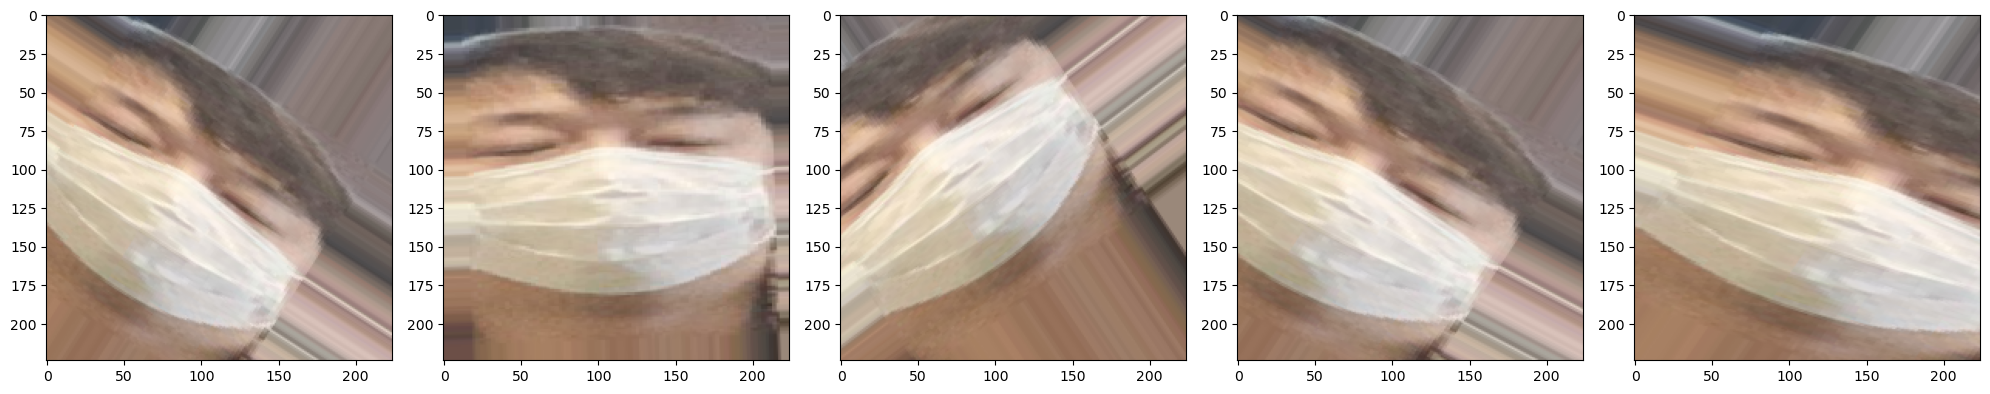

In [7]:
# showing augmented images
images = [train_generator[0][0][0] for i in range(5)]
plotImages(images)


In [9]:
#from keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import preprocess_input
from keras import Sequential,models
from keras.layers import Flatten, Dense,Dropout,BatchNormalization


# Buliding Transfer Learning Model

In [10]:
from tensorflow.keras import layers, models

from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet, excluding the top fully-connected layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Freeze the layers of the base model to prevent them from being trained
for layer in vgg16_base.layers:
    layer.trainable = False

# Build the model
model = models.Sequential([
    vgg16_base,
    layers.Flatten(),  # Flatten the output of the VGG16 base model
    layers.Dense(units=128, activation='relu'),  # First fully-connected layer
    layers.Dropout(0.1),  # Dropout layer for regularization
    layers.Dense(units=256, activation='relu'),  # Second fully-connected layer
    layers.Dropout(0.25),  # Dropout layer for regularization
    layers.Dense(units=2, activation='softmax')  # Output layer with softmax activation
])

In [11]:
# from keras.callbacks import EarlyStopping

# # Early stopping and learning rate reduction
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [12]:
# save best model using vall accuracy
from keras.callbacks import ModelCheckpoint
model_path = 'C:/Users/ADMIN/Downloads/dataset-20240727T170103Z-001/dataset/model/myface1model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:
# compile cnn model
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate during training and testing
)

#model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:

# Fit the model with augmented data
history =model.fit(
        train_generator,
        epochs=50,
        verbose=1,
        validation_data=val_generator,
        callbacks=callbacks_list
    )

Epoch 1/50


 5/19 [======>.......................] - ETA: 2:39 - loss: 0.9051 - accuracy: 0.8078

C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.4763 - accuracy: 0.8703 
Epoch 1: val_accuracy improved from -inf to 0.74534, saving model to C:/Users/ADMIN/Downloads/dataset-20240727T170103Z-001/dataset/model\myface1model.h5


C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 317s 16s/step - loss: 0.4763 - accuracy: 0.8703 - val_loss: 1.4990 - val_accuracy: 0.7453
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.0945 - accuracy: 0.9638 
Epoch 2: val_accuracy improved from 0.74534 to 0.84348, saving model to C:/Users/ADMIN/Downloads/dataset-20240727T170103Z-001/dataset/model\myface1model.h5
19/19 [==============================] - 306s 16s/step - loss: 0.0945 - accuracy: 0.9638 - val_loss: 1.0400 - val_accuracy: 0.8435
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.9777 
Epoch 3: val_accuracy improved from 0.84348 to 0.85093, saving model to C:/Users/ADMIN/Downloads/dataset-20240727T170103Z-001/dataset/model\myface1model.h5
19/19 [==============================] - 295s 16s/step - loss: 0.0571 - accuracy: 0.9777 - val_loss: 0.8526 - val_accuracy: 0.8509
Epoch 4/50
19/19 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9865 
Epoch 4: v

In [15]:
model.save('C:/Users/ADMIN/Downloads/mymodel2_last.h5')

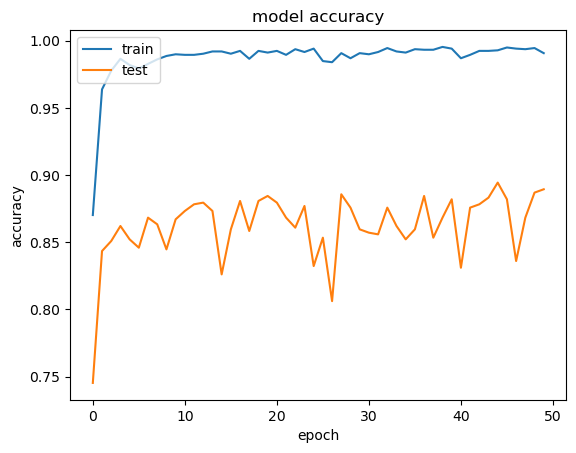

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

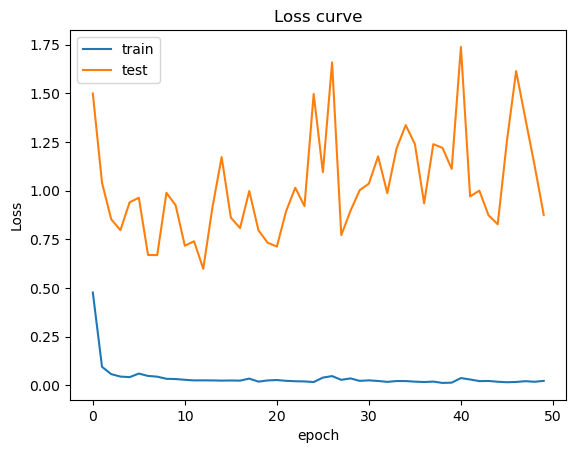

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss curve')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 10s 10s/step


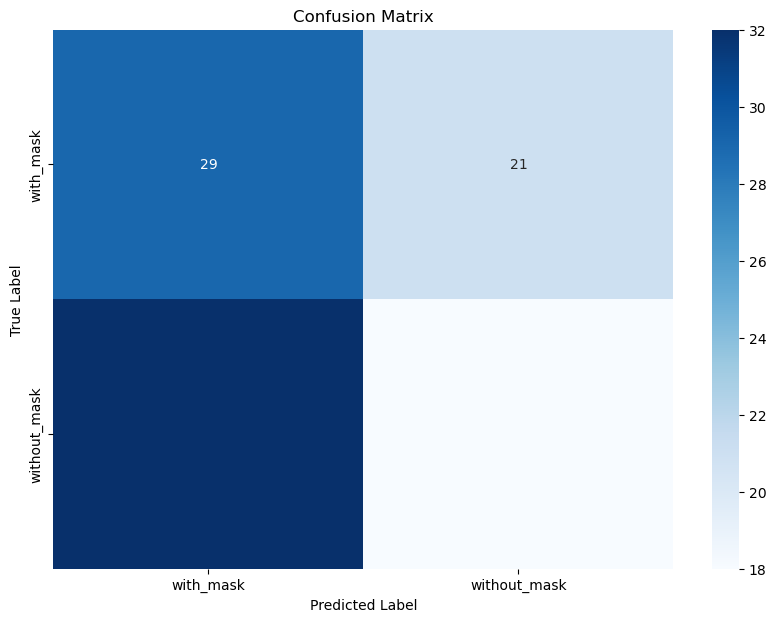

              precision    recall  f1-score   support

   with_mask       0.48      0.58      0.52        50
without_mask       0.46      0.36      0.40        50

    accuracy                           0.47       100
   macro avg       0.47      0.47      0.46       100
weighted avg       0.47      0.47      0.46       100



In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Making predictions on the test set
#test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Getting true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)
